<a href="https://colab.research.google.com/github/CHOIHANJOON/python/blob/main/6_3_%EC%A3%BC%EC%84%B1%EB%B6%84_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
### 차원 축소 알고리즘을 구해보자 // << 데이터 크기를 줄일때 사용함
### PCA : 데이터에 있는 분산이 큰 방향을 찾는것

In [2]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2022-05-24 06:54:32--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2022-05-24 06:54:32--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2022-05-24 06:54:33--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

In [3]:
import numpy as np
fruits = np.load('fruits_300.npy')
fruits_2d=fruits.reshape(-1, 100*100)

#과일 사진 데이터를 다운 하여 넘파이 배열로 적재

In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
pca.fit(fruits_2d)

# n_componentsaoro 매개변수에 주성분의 개수를 지정

PCA(n_components=50)

In [6]:
print(pca.components_.shape)

(50, 10000)


In [7]:
import matplotlib.pyplot as plt
def draw_fruits(arr, ratio=1):
  n = len(arr) # n은 샘플 개수
  # 한 줄에 10개씩 이미지를 그린다. 샘플 개수를 10으로 나누어 전체 행 개수를 계산한다.
  rows = int(np.ceil(n/10))
  # 행이 1개이면 열의 개수는 샘플 개수, 그렇지 않으면 10개
  cols = n if rows < 2 else 10
  fig,axs = plt.subplots(rows, cols,
                          figsize=(cols*ratio, rows*ratio), squeeze=False)
  for i in range(rows):
    for j in range(cols):
      if i*10 + j < n: # n개 까지만 그림
          axs[i,j].imshow(arr[i*10+j], cmap='gray_r')
      axs[i,j].axis('off')
  plt.show()
          

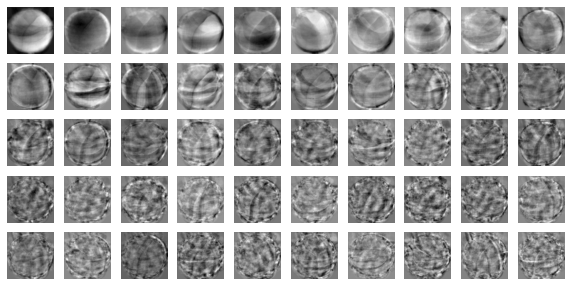

In [8]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

In [10]:
print(fruits_2d.shape) # fruits_2d(샘플의 갯수,특성의 갯수)

(300, 10000)


In [11]:
fruits_pca = pca.transform(fruits_2d) # pca클래스로 형태변환
print(fruits_pca.shape)

(300, 50)


In [12]:
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape) # 복구데이터 백업

(300, 10000)


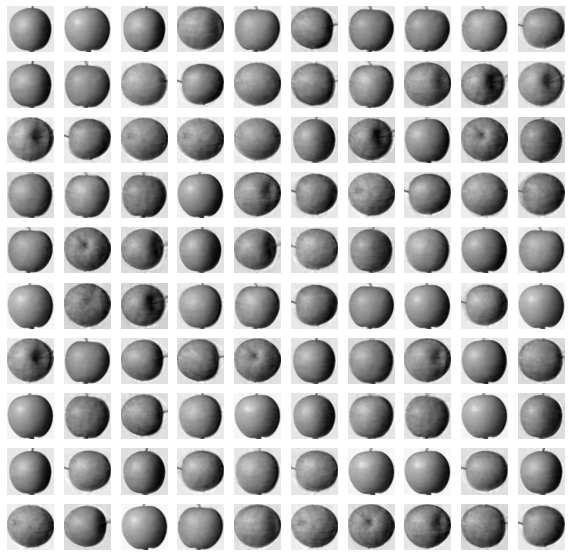

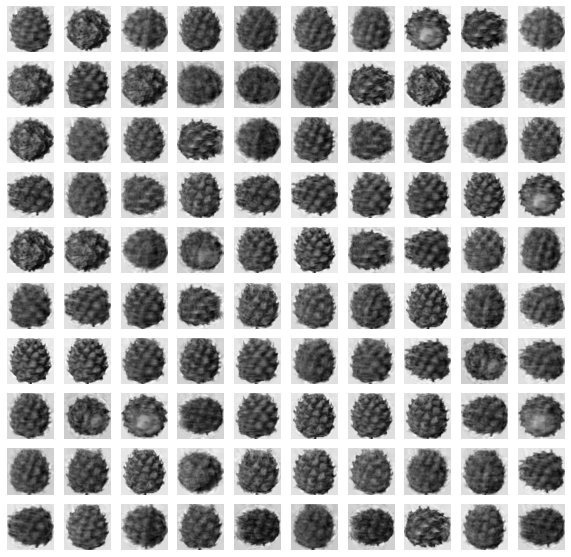

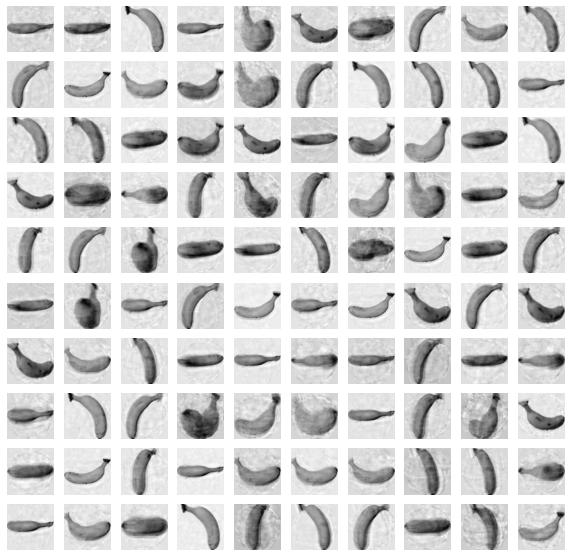

In [13]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)
for start in [0, 100, 200]:
  draw_fruits(fruits_reconstruct[start:start+100])
  print("\n") #복구 데이타의 사진 출력

In [ ]:
### 설명된 분산 : 주성분이 원본 데이터의 분산을 얼마나 잘 나타내는지 기록한 값

In [14]:
print(np.sum(pca.explained_variance_ratio_))

0.9214761315823082


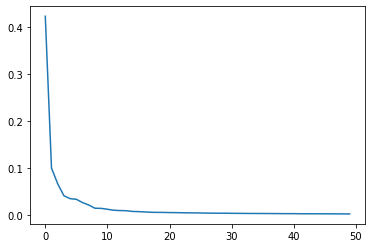

In [15]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

In [18]:
### 지도학습에 적용해 보자~ 3개의 과일 사진을 분류해야 하므로 간단히 LogisticRegression 모델을 사용

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()


In [19]:
#지도학습을 하기위한 타겟값 설정
target = np.array([0]*100 + [1]*100 + [2]*100)

In [20]:
### cross_validate()로 교차 검증을 통해 로지스틱 회귀모델에서 성능을 테스트

from sklearn.model_selection import cross_validate
scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
1.5212560176849366


In [32]:
###PCA로 축소한 fruits_pca를 검증

scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.9933333333333334
0.09801740646362304


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [24]:
#n_components 를 통해 설명된 분산의 50프로에 달하는 주성분을 찾도록 pca모델을 만들어보자

pca=PCA(n_components=0.5)
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [25]:
print(pca.n_components_)

2


In [26]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [27]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.9933333333333334
0.08683648109436035


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [28]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=19)
km.fit(fruits_pca)
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([ 91,  99, 110]))


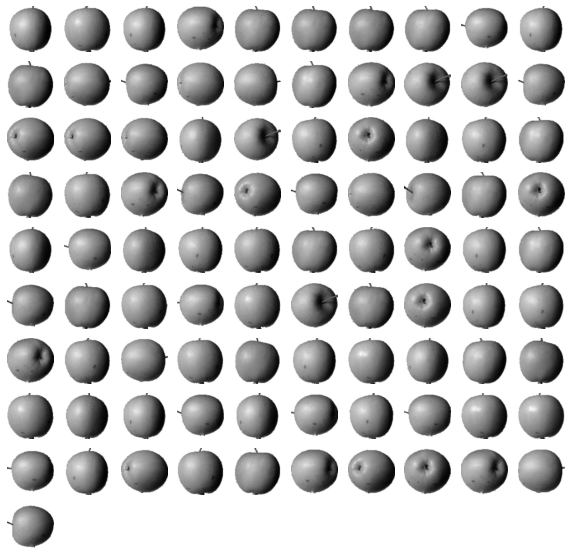

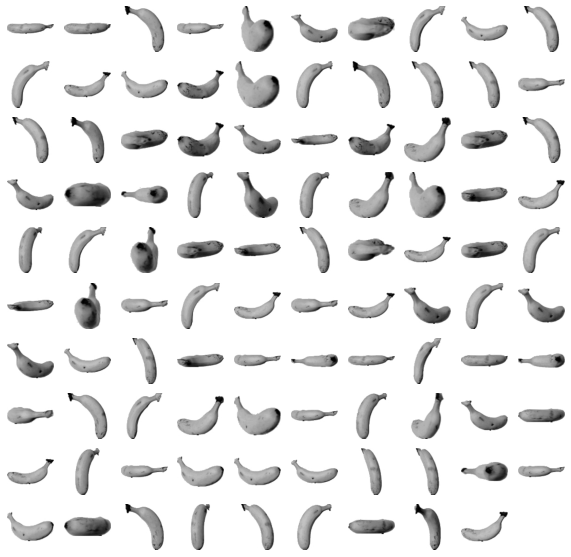

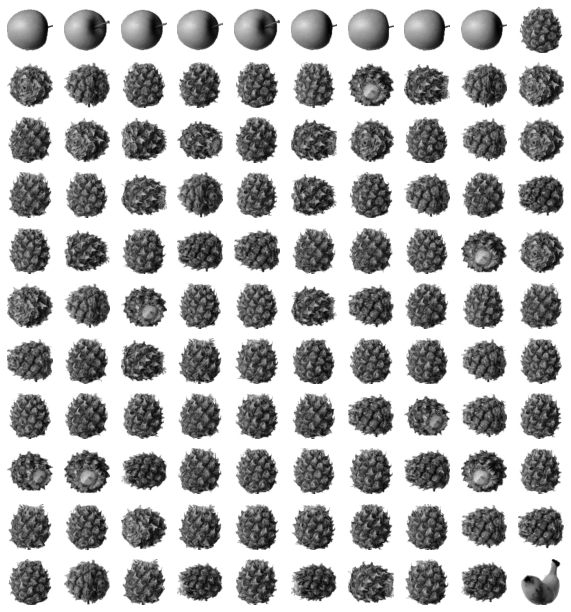

In [29]:
for label in range(0,3):
  draw_fruits(fruits[km.labels_ == label])
  print("\n")

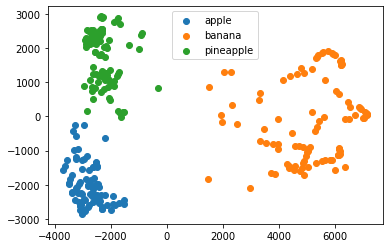

In [31]:
for label in range(0,3):
  data = fruits_pca[km.labels_ == label]
  plt.scatter(data[:,0], data[:,1])
plt.legend(['apple', 'banana', 'pineapple'])
plt.show()

In [ ]:
### 키워드 정리
# 차원 축소란? : 원본데이터의 특성을 적은 수의 새로운 특성으로 변환하는 비지도 학습의 한 종류 // 저장공간을 줄이고 시각화 하기 쉽다, 성능을 높일 수 있다.
# 주성분 분석 : 가장 분산이 큰 방향을 찾는 방법. // 원본 데이터를 주성분에 투영하여 새로운 특성을 만들 수 있슴/ 일반적으로 데이터에있는 특성개수보다 작음
# 설명된 분산 : 주성분 분석에서 주성분이 얼마나 원본 데이터의 분산을 잘나타냈는지 기록한것.//사이킷런의 pca클래스는 주성분 개수나 비율을 설정 할 수 있음

